# Домашнє завдання: Візуалізація даних з Matplotlib

## Опис завдання
У цьому домашньому завданні ви продовжите працювати з датасетом про оренду велосипедів `yulu_rental.csv`, але тепер будете використовувати бібліотеку Matplotlib для створення більш складних та налаштованих візуалізацій.

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Завантаження даних
df = pd.read_csv(r'D:\Навчання\Data Analytics\КУРС DATA ANALIST\python\DATA\yulu_rental.csv')
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додаткові колонки
df['month'] = df.index.month
df['hour'] = df.index.hour
df['weekday'] = df.index.day_name()
df['weekday_num'] = df.index.weekday
df['week'] = df.index.isocalendar().week
df['year'] = df.index.year
df['day'] = df.index.day

## Завдання 1: Порівняння Pandas vs Matplotlib

**Завдання:**
Побудуйте лінійний графік середньої кількості оренд помісячно впродовж всього періоду в даних двома способами:
1. Використовуючи Pandas (DataFrame.plot())
2. Використовуючи Matplotlib безпосередньо

В обох методах додайте маркери-кружечки. Можна також задати свій відмінний від стандартного колір.

Підказка: отримати потрібний формат даних найзручніше з методом датафрейму `resample`.

**Опишіть свої спостереження:** чим відрізняються 2 побудованих графіки? Який вам більше подобається?

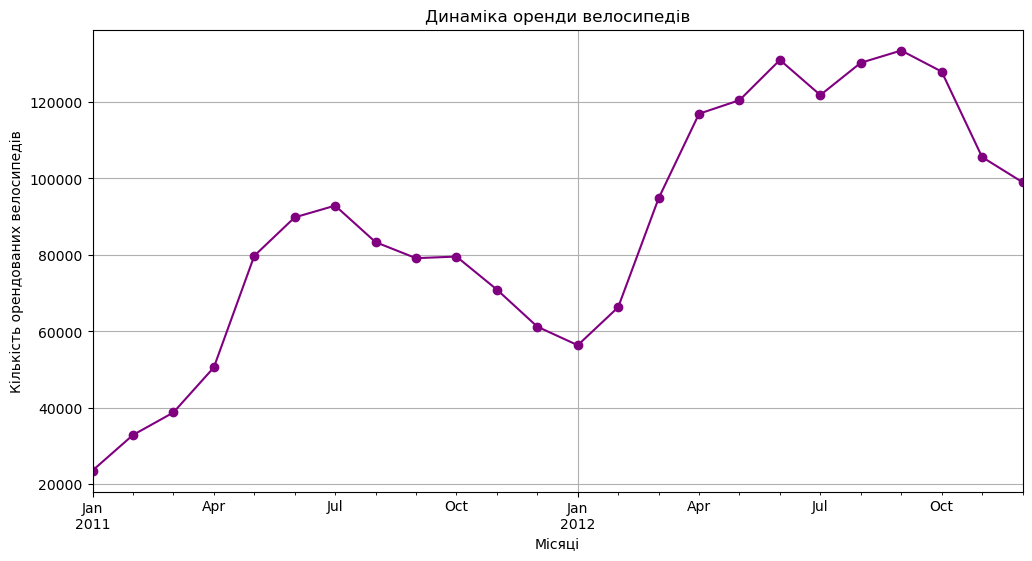

In [10]:
# Pandas
monthly_rent = df['count'].resample('ME').sum()

monthly_rent.plot(
    figsize = (12, 6),
    marker = 'o',
    color = 'purple',
    title = 'Динаміка оренди велосипедів',
    xlabel = 'Місяці',
    ylabel = 'Кількість орендованих велосипедів',
    grid = True
)
plt.show()


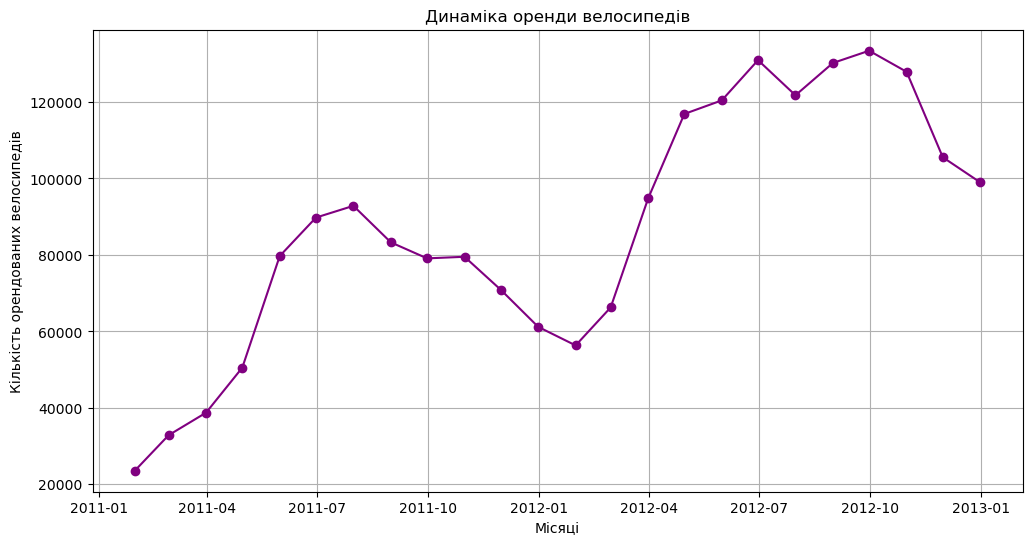

In [13]:
# Matplotlib
plt.figure(figsize = (12, 6))
plt.plot(monthly_rent, 'o-', color='purple')
plt.title('Динаміка оренди велосипедів')
plt.xlabel('Місяці')
plt.ylabel('Кількість орендованих велосипедів')
plt.grid(True)
plt.show()

Графіки трохи відрізняються між собою відображенням сітки, а також підписами осей. Також графік на Pandas має коротший та інтуїтивно зрозуміліший код. Як на мене, краще виглядає графік, побудований за допомогою Pandas. Він простіший з точки зору написання коду (що є дуже важливим на початковому етапі),  має більш лаконічні і зрозумілі підписи осей.

## Завдання 2: Робота зі списками та numpy

**Завдання:**
Вам задані 3 списки:
1. Номер дня тижня.
2. Продажі в тиждень 1.
3. Продажі в тиждень 2.

Створіть графік, на якому лінійними графіками різних кольорів накладено продажі за обидва тижні.

Обовʼязково додайте назву графіку, підписи вісям ОХ, ОУ, назви кожного з рядів даних, легенду.

**Дайте відповіді на питання**
1. Судячи з графіку, в який тиждень проодажі були стабільніше?
2. Чи можете ви підкріпити свій висновок обчисленнями? Якими саме? Можна (але не обовʼязково) навести ці обчислення.

In [16]:
# Дані у вигляді списків
days = [1, 2, 3, 4, 5, 6, 7] # 1 - це понеділок
sales_week1 = [1349,1562,1600,1606,1510,959,822]  # Продажі за тиждень1
sales_week2 = [1321,1263,1162,1406,1421,1248,1204]  # Продажі за тиждень2

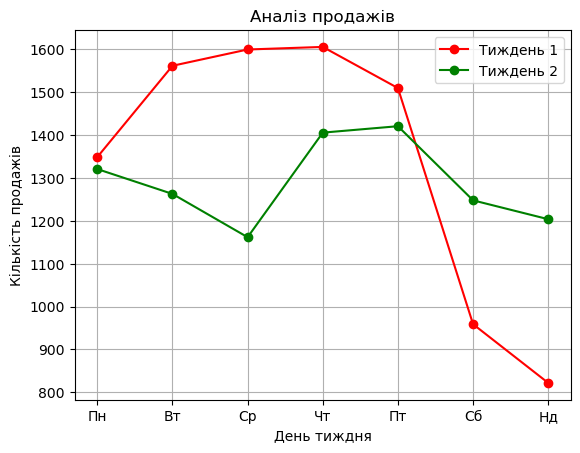

In [19]:
plt.plot(days, sales_week1, 'o-', label = 'Тиждень 1', color = 'red')
plt.plot(days, sales_week2, 'o-', label = 'Тиждень 2', color = 'green')
plt.title('Аналіз продажів')
plt.xlabel('День тиждня')
plt.ylabel('Кількість продажів')
plt.xticks(days, ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Нд'])
plt.grid(True)
plt.legend()
plt.show()

Судячи з графіка, продажі в тиждень 2 були стабільнішими —  лінія графіка м’якіша, без різких стрибків.  
Це можна підтвердити обчисленням стандартного відхилення:

Тиждень 1: 300,00

Тиждень 2: 90,91


In [21]:
import numpy as np

std_week1 = np.std(sales_week1)
std_week2 = np.std(sales_week2)

print(f"Стандартне відхилення Тиждень 1: {std_week1:.2f}")
print(f"Стандартне відхилення Тиждень 2: {std_week2:.2f}")

Стандартне відхилення Тиждень 1: 300.00
Стандартне відхилення Тиждень 2: 90.91


## Завдання 3: Subplot - 2x2 сітка графіків

**Завдання:**
Створіть сітку 2x2 з чотирма різними графіками, використовуючи `plt.subplot()`:
1. Лінійний графік середньої температури помісячно.
2. Стовпчикова діаграма середньої годинної кількості оренд за сезонами.
3. Гістограма вологості за всіма погодинними вимірами.
4. Scatter plot температури vs кількості оренд.

Кожен підграфік має містити всі необхідні підписи. Дашборд має містити назву.

In [38]:
avg_temp_monthly = df['temp'].resample('ME').mean()

avg_count_season = df.groupby('season')['count'].mean()

season_labels = ['Зима', 'Весна', 'Літо', 'Осінь' ]

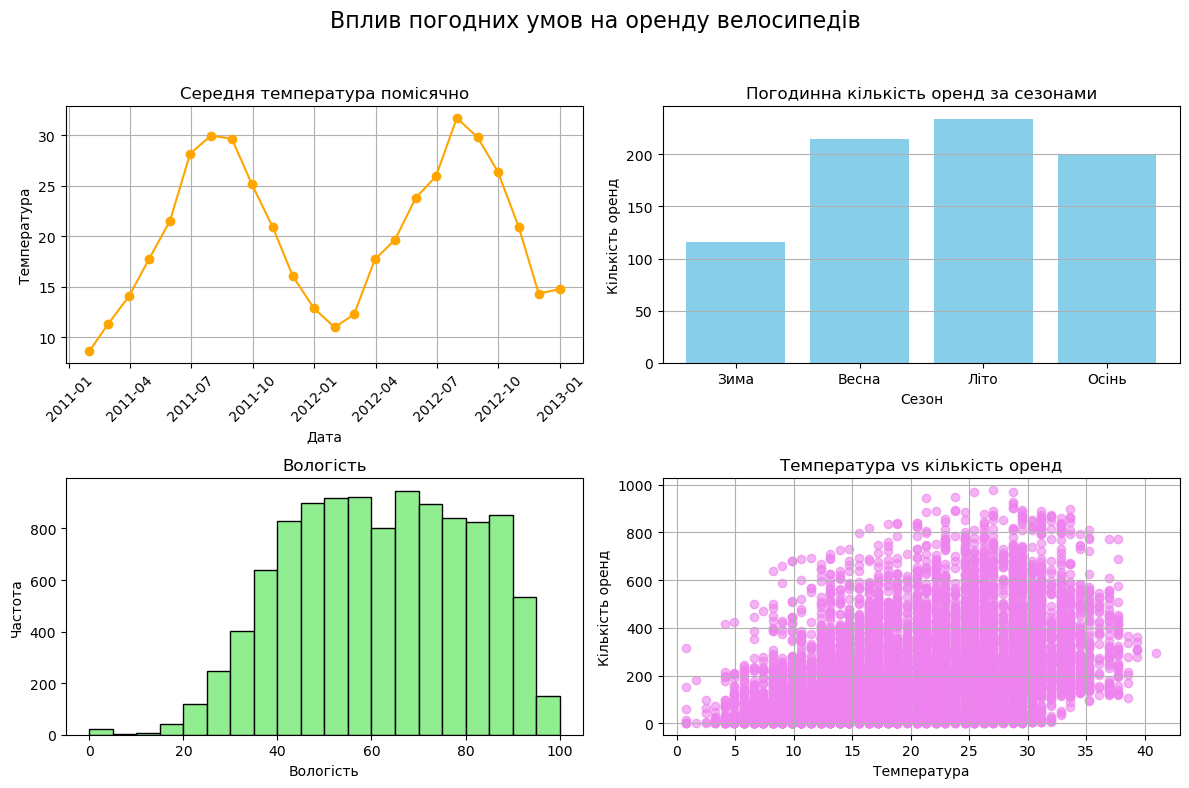

In [42]:
plt.figure(figsize=(12, 8))
plt.suptitle('Вплив погодних умов на оренду велосипедів', fontsize=16)

# 1. Середня температура помісячно
plt.subplot(2, 2, 1)
plt.plot(avg_temp_monthly.index, avg_temp_monthly, marker='o', color='orange')
plt.title('Середня температура помісячно')
plt.xlabel('Дата')
plt.ylabel('Температура')
plt.xticks(rotation =45)
plt.grid(True)

# 2. Cередня погодинна кількість оренд за сезонами.
plt.subplot(2, 2, 2)
plt.bar(avg_count_season.index, avg_count_season, color='skyblue')
plt.title('Погодинна кількість оренд за сезонами')
plt.xlabel('Сезон')
plt.ylabel('Кількість оренд')
plt.xticks(ticks=[1, 2, 3, 4], labels=season_labels)
plt.grid(axis='y')

# 3. Гістограма вологості
plt.subplot(2, 2, 3)
plt.hist(df['humidity'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Вологість')
plt.xlabel('Вологість')
plt.ylabel('Частота')

# 4. Температура vs кількість оренд
plt.subplot(2, 2, 4)
plt.scatter(df['temp'], df['count'], alpha=0.6, color='violet')
plt.title('Температура vs кількість оренд')
plt.xlabel('Температура')
plt.ylabel('Кількість оренд')
plt.grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


## Завдання 4: Subplots - об'єктно-орієнтований підхід

**Завдання:**
Створіть той самий набір графіків, але використовуючи `fig, ax = plt.subplots()`.

**Дайте відповідь на питання своїми словами**
- Чим відрізняється підхід побудови кількох графіків на одній фігурі з `plt.subplots()` від `plt.subplot()`?

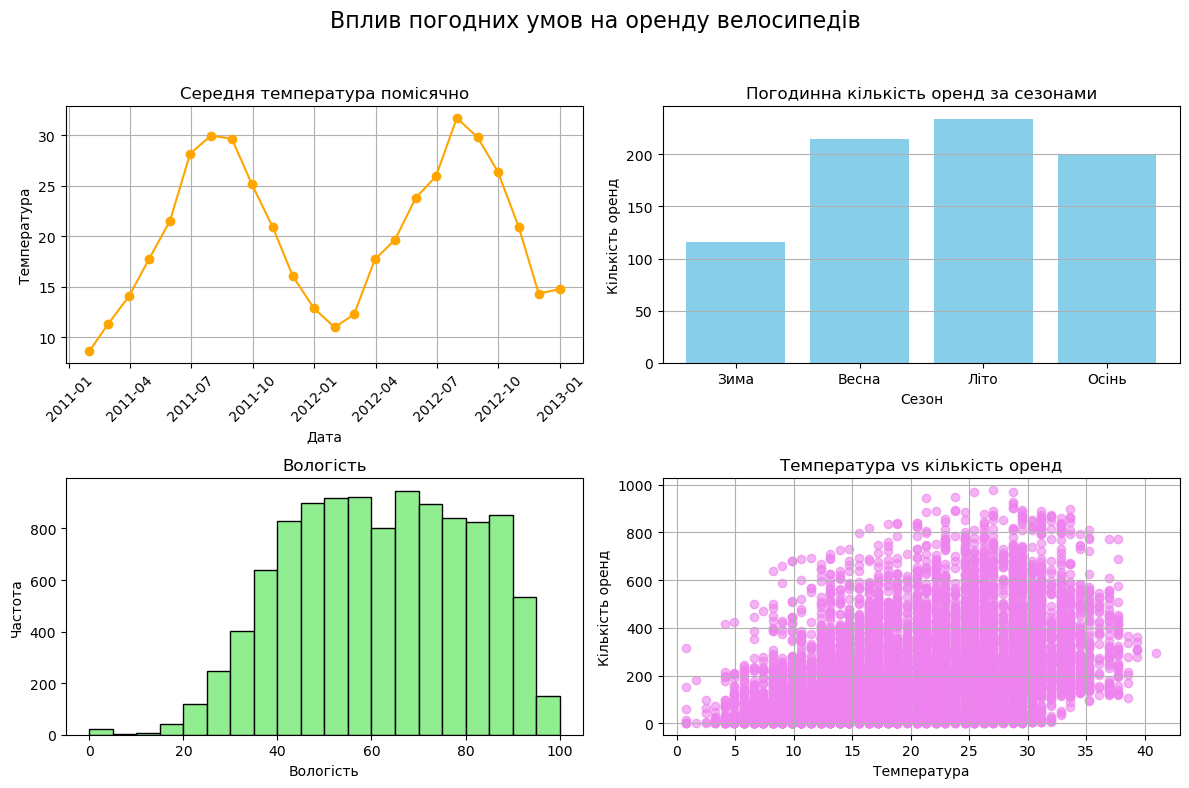

In [46]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Верхній лівий — середня температура помісячно
ax[0, 0].plot(avg_temp_monthly.index, avg_temp_monthly, marker='o', color='orange')
ax[0, 0].set_title('Середня температура помісячно')
ax[0, 0].set_xlabel('Дата')
ax[0, 0].set_ylabel('Температура')
ax[0, 0].tick_params(axis='x', rotation=45)
ax[0, 0].grid(True)

# Верхній правий —  середня годинна кількість оренд за сезонами.
ax[0, 1].bar(avg_count_season.index, avg_count_season, color='skyblue')
ax[0, 1].set_title('Погодинна кількість оренд за сезонами')
ax[0, 1].set_xlabel('Сезон')
ax[0, 1].set_ylabel('Кількість оренд')
ax[0, 1].grid(axis='y')
ax[0, 1].set_xticks([1, 2, 3, 4])
ax[0, 1].set_xticklabels(season_labels)

# Нижній лівий — гістограма вологості
ax[1, 0].hist(df['humidity'], bins=20, color='lightgreen', edgecolor='black')
ax[1, 0].set_title('Вологість')
ax[1, 0].set_xlabel('Вологість')
ax[1, 0].set_ylabel('Частота')

# Нижній правий — температура vs кількість оренд
ax[1, 1].scatter(df['temp'], df['count'], alpha=0.6, color='violet')
ax[1, 1].set_title('Температура vs кількість оренд')
ax[1, 1].set_xlabel('Температура')
ax[1, 1].set_ylabel('Кількість оренд')
ax[1, 1].grid(True)


# Загальний вигляд
fig.suptitle('Вплив погодних умов на оренду велосипедів', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # залишаємо місце для заголовка
plt.show()

Підхід plt.subplot() — це старіший і простіший спосіб. Він підходить, коли графіків небагато, але він менш гнучкий: кожен графік створюється окремо, і важко щось змінювати в них усіх разом.

Підхід plt.subplots() — сучасніший спосіб.  Він створює  набір "полів" для графіків. Це дозволяє працювати з кожним графіком як з об’єктом та змінювати параметри гнучко. Але він більш громіздкий, передбачає більше коду і, як на мене, менш інтуїтивно зрозумілий.

subplot() — простіший, але обмежений спосіб.  
subplots() — складніший, але набагато потужніший.

## Завдання 5: Тонкі налаштування форматування графіка

**Завдання:**
Подібно до прикладу, наведеного в лекції, створіть професійно оформлений графік помісячної динаміки оренди з максимальною кількістю деталей та налаштувань. Ваш графік має включати:

**Обов'язкові елементи:**
1. **Три лінії:** середнє, максимум, мінімум за місяцями
2. **Різні стилі ліній:** суцільна, пунктирна, крапкова + різні маркери
3. **Заливка області** між мінімумом та максимумом
4. **Дві анотації:** для найвищого та найнижчого середнього значення
5. **Горизонтальна лінія** середнього за весь рік
6. **Двошарова сітка:** основна та допоміжна
7. **Стилізована легенда** з тінню
8. **Текстовий блок** зі статистикою в кутку графіка
9. **Професійне оформлення:** заголовки, підписи осей з жирним шрифтом

**Результат:** Графік повинен виглядати як готова ілюстрація для бізнес-звіту або наукової публікації.

Приклад очікуваного результату.
![](https://drive.google.com/uc?id=1YoJByivzlqncEF2zbWu3EhGSZ7XRme8T)


**Питання для інтерпретації:**
1. Яка перевага додавання анотацій на графік?
2. Для чого використовується fill_between()?
3. Як текстовий блок допомагає в інтерпретації даних?

In [49]:
import matplotlib.dates as mdates

In [52]:
monthly_stats = df['count'].resample('ME').agg(['mean', 'max', 'min'])

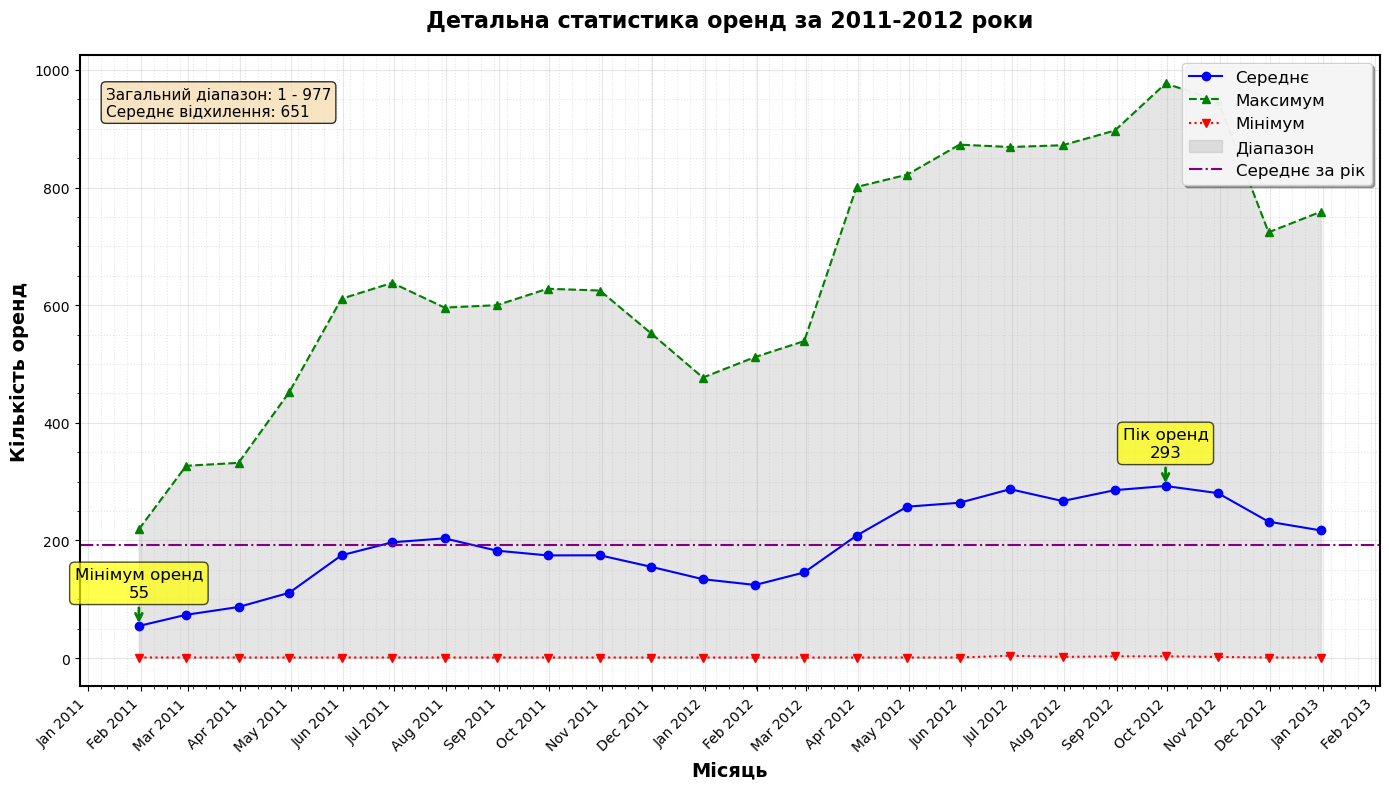

In [83]:
fig, ax = plt.subplots(figsize=(14, 8))

# Малюємо лінії
ax.plot(monthly_stats.index, monthly_stats['mean'], 'b-o', label='Середнє')
ax.plot(monthly_stats.index, monthly_stats['max'], 'g--^', label='Максимум')
ax.plot(monthly_stats.index, monthly_stats['min'], 'r:v', label='Мінімум')

# Заливка між max та min
ax.fill_between(monthly_stats.index, monthly_stats['min'], monthly_stats['max'], alpha=0.2, color='gray', label='Діапазон')

# Анотації для екстремальних значень
max_idx = monthly_stats['mean'].idxmax()
max_val = monthly_stats['mean'].max()
ax.annotate(f'Пік оренд\n{max_val:.0f}',
            xy=(max_idx, max_val), 
            xytext=(max_idx, max_val + 50), 
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

min_idx = monthly_stats['mean'].idxmin()
min_val = monthly_stats['mean'].min()
ax.annotate(f'Мінімум оренд\n{min_val:.0f}',
            xy=(min_idx, min_val),
            xytext=(min_idx, min_val + 50),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=12, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow', alpha=0.7))

# Cередня лінія за весь період
overall_mean = df['count'].mean()
ax.axhline(y=overall_mean, linestyle='-.', color='purple', label='Середнє за рік')

# Двошарова сітка
ax.grid(True, which='major', linestyle='-', alpha=0.3)
ax.grid(True, which='minor', linestyle=':', alpha=0.3)
ax.minorticks_on()

# Легенда
ax.legend(loc='upper right', fontsize=12, frameon=True, shadow=True, fancybox=True,  framealpha=0.9)

# Текстовий блок
textstr = f'Загальний діапазон: {monthly_stats["min"].min():.0f} - {monthly_stats["max"].max():.0f}\n'
textstr += f'Середнє відхилення: {(monthly_stats["max"] - monthly_stats["min"]).mean():.0f}'
ax.text(0.02, 0.95, textstr, transform=ax.transAxes, fontsize=11, verticalalignment='top', 
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# Налаштування осей
ax.set_xlabel('Місяць', fontsize=14, fontweight='bold')
ax.set_ylabel('Кількість оренд', fontsize=14, fontweight='bold')
ax.set_title('Детальна статистика оренд за 2011-2012 роки',
             fontsize=16, fontweight='bold', pad=20)

# Форматування дат на осі X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator())
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Налаштування рамки
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

plt.tight_layout()
plt.show()


Відповіді на питання:
1. Яка перевага додавання анотацій на графік?
Анотації допомагають швидко звернути увагу на ключові моменти — наприклад, пік оренд чи найменше значення. Це особливо зручно для презентації: глядач відразу бачить, де важлива точка і на що звернути увагу.

3. Для чого використовується fill_between()?
Ця функція виділяє область між двома лініями — наприклад, між мінімумом і максимумом. Це візуально підкреслює коливання, показує розкид значень. Завдяки цьому графік виглядає більш інформативним.

4. Як текстовий блок допомагає в інтерпретації даних?
Текстовий блок — це зручний спосіб винести коротку статистику чи іншу важливу інформацію прямо на графік. Він одразу показує ключові показники глядачеві без потреби шукати ці значення в коді чи таблиці.